#  NLP- Reviews Analysis

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#general setttings
sns.set_context('poster',0.6)
sns.set_style('darkgrid')

In [3]:
#reading file
path  = r'C:\Users\97250\Desktop\studied\R ,python\data science JOSE\20-Natural-Language-Processing\yelp.csv'
data = pd.read_csv(path,header=0 )

## Assistant function

In [4]:
# helpfull function
palettes = ['gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno']
palettes = ['husl',"Set2",'pastel','autumn','gnuplot2_r','gnuplot2']

In [5]:
def show(column,m=0):

    """
    This function shows info about given column on ranking
    """

    # Aggeregation
    agg  = data.groupby('stars').mean()
    agg  = agg.reset_index()[[column,'stars']]
    
    #Correlation
    corrValue = agg.corr().iloc[0][1]
    corrValue = str(round(corrValue ,3) )
    
    # Plot
    plt.figtext(.5,.9,"\n " + column.capitalize() +"  Relate to Rank \n corr = " +corrValue  + "\n", fontsize=25, ha='center')
    sns.barplot(x='stars', y = column, data = agg , palette=palettes[m]) ##sns.color_palette("Set2")
    plt.ylabel(column.capitalize()+' Frequency \n')
    plt.xlabel("")  

In [6]:
data

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,26/01/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,27/07/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,14/06/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,27/05/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,05/01/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,28/07/2012,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,18/01/2012,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,16/11/2010,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,02/12/2012,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


# Feature Engineering


In [7]:

# adding length of review    The most affectin feature as it seems
data['words'] = data['text'].apply(lambda x:len(x.split()))

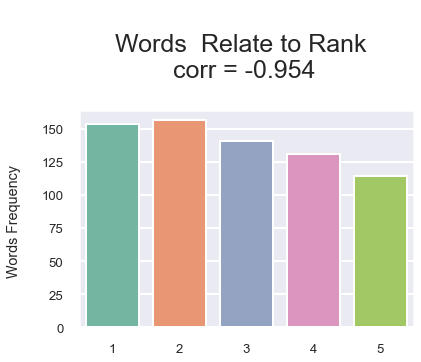

In [8]:
show('words',m=1)

##  Creating time features

In [9]:
data['timeStamp'] = data['date'].apply(lambda x : pd.to_datetime(x))

data['month'] = data['timeStamp'].apply(lambda x : x.month)
data['day of month'] = data['timeStamp'].apply(lambda x : int(x.day))

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['day of week'] = data['timeStamp'].apply(lambda x:x.dayofweek)

## Assistant function for Date-Features

In [10]:
def time(column):

    # Aggeregation
    agg  =  data.groupby(column).mean().reset_index()[[column,'stars']]

    # Correlation
    corrValue = agg.corr().iloc[0][1]
    corrValue = str(round(corrValue ,3) )
    
    # Plot
    plt.figtext(.5,.9,"\n " + column.capitalize() +"  Relate to Rank \n corr = " +corrValue  + "\n", fontsize=25, ha='center')
    sns.barplot(x =column, y='stars', data = agg,palette = palettes[1])
    plt.ylabel("Avg. rank per  "+ column.capitalize()+'  \n')
    plt.xlabel("")

# Let's check the impact of time over Rank

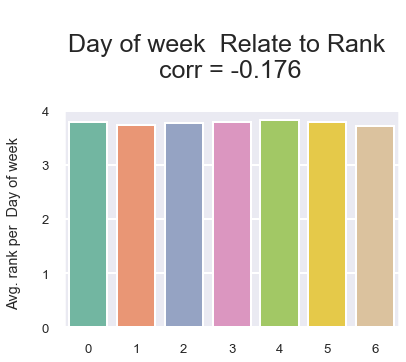

In [11]:
time('day of week')

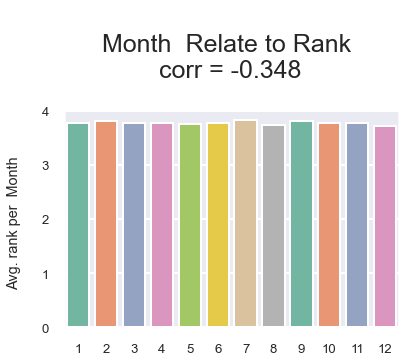

In [12]:
time('month')

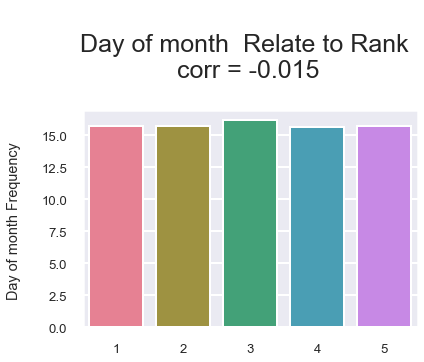

In [13]:
show('day of month')

##  Apparantly no impact of Time-Features over Rank

#        NLP section

### Creating question & answer marks-Features 

In [14]:
data['answer_mark'] = data['text'].apply(lambda x:x.count('!'))
data['question_mark'] = data['text'].apply(lambda x:x.count('?'))

### Creating Anger Words-Features - 3 versions

In [16]:
anger_words                  = ['fuck','fucking','annoying','shitty','ass','busy','too loud','too busy','too noisy','disaster','bad','not'] #corr 0.94
anger_words_ver2 = ['fuck','fucking','annoying','shitty','ass','busy','too loud','too busy','too noisy','disaster','bad']       #corr 0.998
fucking_bad                  = ['fucking','bad']      #corr 0.994


listsStrs   = 'anger_words,anger_words_ver2,fucking_bad'.split(',')
listsValues = [anger_words,anger_words_ver2,fucking_bad]


#sum of each words group

def angry(text):
    summ=0
    for word in text.lower().split():
        if word in l:
            summ+=1
    return summ


# create 3 more columns and present data
    
for c,l in enumerate(listsValues):
    
    # Adding column
    data[listsStrs[c]] = data['text'].apply(angry) 

## Visualize impact of  Anger Words-Features 

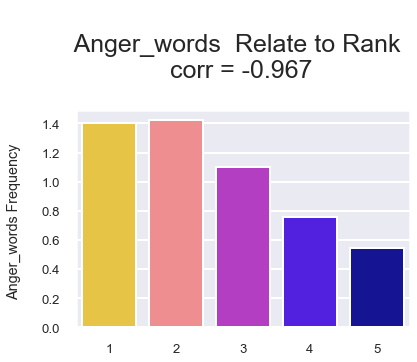

In [17]:
show('anger_words',m=4)

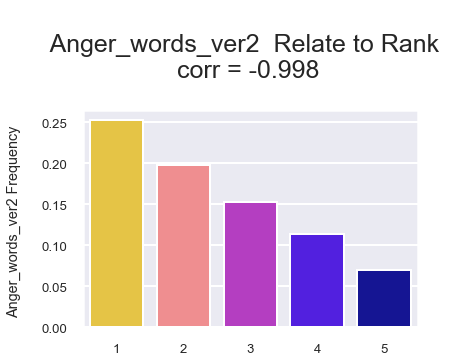

In [20]:
show('anger_words_ver2',m=4)

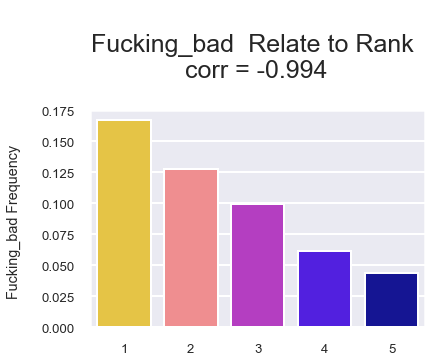

In [21]:
show('fucking_bad',m=4)

# Seems like fucking_bad-words has the best coorelation:    0.994!!  
### (Relates to the bag-of-words size)

### linear Model Assist Function

In [22]:
def lm(column):

    # Aggeregation
    agg  = data.groupby('stars').mean()
    agg  = agg.reset_index()[[column,'stars']]
    
    #Correlation
    corrValue = agg.corr().iloc[0][1]
    corrValue = str(round(corrValue ,3) )
    
    # Plot
    sns.lmplot(height=7,x='stars', y = column, data = agg)
    plt.title("\n " + column.capitalize() +"  Relate to Rank \n corr = " +corrValue  + "\n", fontsize=25, ha='center')
    plt.ylabel(column.capitalize()+' Frequency \n')
    plt.xlabel("")  

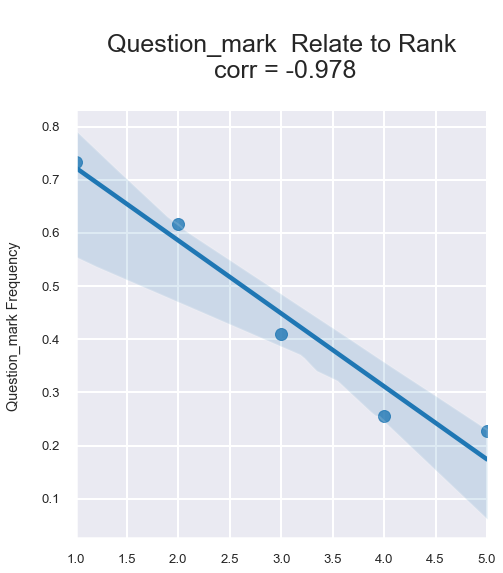

In [23]:
lm('question_mark')

###       question mark highly affects rank.  corr: -0.987

##          Segment-focused research

###  Basic Variables

In [ ]:
# Top 50 bussinesses
top_50_reviwed_businesses = data.groupby('business_id').count()['words']
top_50_reviwed_businesses = top_50_reviwed_businesses.sort_values(ascending=False).iloc[:51].drop('#NAME?')

# Data of them
dataOf_Top50Businesses = data.set_index('business_id').loc[top_50_reviwed_businesses.index]



# 30 highly reviewers
top_30_users = data.groupby('user_id').count()['words']
top_30_users = top_30_users.sort_values(ascending=False).iloc[:31].drop('#NAME?')

# data of them
dataOf_Top30Users = data.set_index('user_id').loc[top_30_users.index]

In [64]:
dataOf_thoseWhoRanked_5 = dataOf_Top30Users.groupby(['stars','user_id']).count().loc[[5]]
indexOf_thoseWhoRanked_5 = dataOf_thoseWhoRanked_5.index.get_level_values(1) #Multi-Index Complexity
indexOf_thoseWho__never__Ranked_5 = [x for x in   top_30_users.index    if x not in    indexOf_thoseWhoRanked_5]

In [65]:
indexOf_thoseWho__never__Ranked_5

['JffajLV-Dnn-eGYgdXDxFg',
 'lPaYMDmJbAnv_3pmZH_inw',
 '3gIfcQq5KxAegwCPXc83cQ',
 'Kqvfep2mxS10S50FbVDi4Q']

## Visualize about Unenthusiastic Reviwers

In [92]:
def stdAndMean(data,index):
    
    mean = data.loc[index].groupby('user_id').mean()['stars']
    std = data.loc[index].groupby('user_id').std()['stars']
    
    data = pd.concat([mean, std], axis=1)
    data.columns = ['mean','std']
    
    return data

In [100]:
a## = stdAndMean(dataOf_Top30Users  ,  indexOf_thoseWho__never__Ranked_5)

,mean,std
user_id,,
3gIfcQq5KxAegwCPXc83cQ,3.000000,0.774597
JffajLV-Dnn-eGYgdXDxFg,3.416667,0.668558
Kqvfep2mxS10S50FbVDi4Q,3.363636,0.504525
lPaYMDmJbAnv_3pmZH_inw,2.750000,1.055290


Text(0.5, 0.9, '\n Mean & std Of unenthusiasic Reviewers  \n')

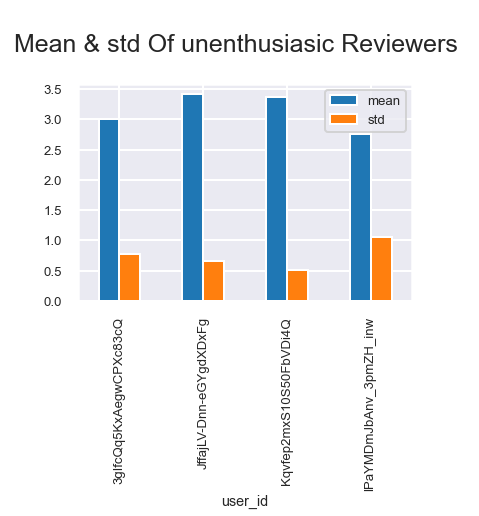

In [108]:
a.plot.bar()
plt.figtext(.5,.9,"\n Mean & std Of unenthusiasic Reviewers  \n", fontsize=25, ha='center')

## Conclusion:
###  Reviewer who never gave 5 stars , tebd to have low rank are less informative to analyze.

## Words Segmentation per each top30 Users and rank

In [112]:
### strong correlation

wordsAvg_perEachUser_PerRank = dataOf_Top30Users.groupby(['stars','user_id']).mean().unstack(0)['words'].transpose()

# The variance of the top viewers in all their views
rankVariance = pd.DataFrame(wordsAvg_perEachUser_PerRank.var(),columns=['variance of rank in reviews'])
# The mean of the top viewers in all their views
rankMean     = pd.DataFrame(wordsAvg_perEachUser_PerRank.mean(),columns=['mean of rank in reviews'])

rankFeatures = rankMean.join(rankVariance,on='user_id')

In [113]:
# Make int
rankFeatures['mean of rank in reviews'] = rankFeatures['mean of rank in reviews'].apply(lambda x:int(x))
rankFeatures['variance of rank in reviews'] = rankFeatures['variance of rank in reviews'].apply(lambda x:int(x))

In [114]:
rankFeatures

,mean of rank in reviews,variance of rank in reviews
user_id,,
0CMz8YaO3f8xu4KqQgKb9Q,112,1850
0bNXP9quoJEgyVZu9ipGgQ,283,8052
0mqHhdKEdak_A1FBhFNXqA,81,2165
3gIfcQq5KxAegwCPXc83cQ,348,15149
4ozupHULqGyO42s3zNUzOQ,229,1009
6ts41fCsDKHbFZaKOMNmVQ,135,545
7GC9fVWKa4a1ZmBGLH6Uww,255,18281
90a6z--_CUrl84aCzZyPsg,65,99
APLIPfq1Rf8QyhHHk2uAyA,386,56920


## correlation between rank and other rank features

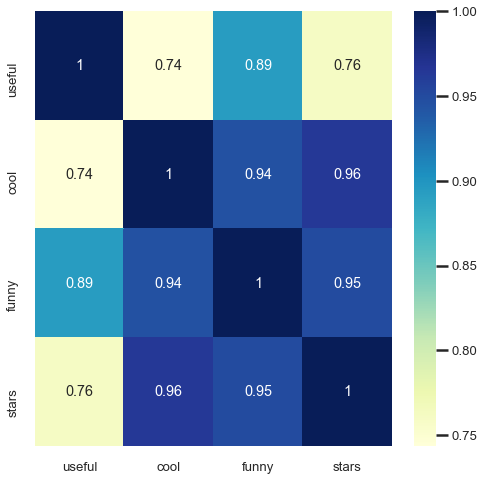

In [150]:
plt.figure(figsize=(8,8))
plotData = abs(data.groupby('stars').mean().reset_index()[['useful','cool','funny','stars']].corr())
sns.heatmap(plotData,cmap='YlGnBu',annot=True)

# Machine Learning

###      Clean

In [26]:
# drop time features because as we saw , no contribution to the result
data.drop(['day of month','date','timeStamp','day of week'],axis=1,inplace=True)

# drop unnessary columns
data.drop(['type','review_id'],axis=1,inplace=True)

# drop categorial features 
data.drop(['user_id','text','business_id'],axis=1,inplace=True)

In [26]:
### Do notice!  
# Some of features dropped are valueable.

# besiness_id - some business may be reaky successfull
        # after finding top businesses , make dummies of them and concat
    
# text - BOW- This is the essential of this task.

# user_id - in deep learning find the specific -highly reviewers-users
        # and get dummies and see what is the affect of them
        

### Segmentation

In [168]:
X = data.drop('stars',axis=1)
y = data[['stars']]

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Evaluation Assist Function

In [207]:
def evaluate():
    
    """
    Evaluation function.
    Print model's evaluation by what's in 'predictions' variable
    """
    
    MAE = round(mean_absolute_error(predictions,y_test),5)
    
    print('The RMSE is: ' , round(np.sqrt(mean_squared_error(predictions,y_test)),5))
    print('The MAE  is: ' , round(MAE,5))
    
    print('The mean is: ', y.mean())
    print('The rational MAE is: ' , round(MAE/y.mean(),3))

### Desicion Tree Algorithm  and Results

In [26]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X_train, y_train, cv=10)

regressor.fit(X_train,y_train)

predictions = regressor.predict(X_test)

In [28]:
evaluate()

##0.86




The RMSE is:  1.58784
The MAE  is:  1.16953


The mean is:  stars    3.7775
dtype: float64
The rational MAE is:  stars    0.31
dtype: float64
